# Build a system that can predict if a Thyroid Cancer survivor can relapse(his or her cancer reoccurs)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Loading the dataset
data = pd.read_csv('dataset.csv')

print("Columns in Dataset:\n\n", data.columns)

Columns in Dataset:

 Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [15]:
# Data Preprocessing

# Separate target and features
y = data['Recurred']  
X = data.drop('Recurred', axis=1) 

# Handle missing values
print("\nMissing Values in Dataset:\n", X.isnull().sum())
X = X.fillna(X.mean())


Missing Values in Dataset:
 Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
dtype: int64


C:\Users\Trushna\AppData\Local\Temp\ipykernel_16788\2957907673.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = X.fillna(X.mean())


In [16]:
# Identify categorical columns and encode them
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col].astype(str))

print("\nColumns after Encoding Categorical Variables:\n", X.head())


Columns after Encoding Categorical Variables:
    Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 2   
1   34       0        0           1                0                 2   
2   30       0        0           0                0                 2   
3   62       0        0           0                0                 2   
4   62       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           3          2         1     2  0  0  0   
1                     1           3          2         1     2  0  0  0   
2                     4           3          2         1     2  0  0  0   
3                     4           3          2         1     2  0  0  0   
4                     1           3          2         0     2  0  0  0   

   Stage  Response  
0      0         2  
1      0      

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Feature scaling for numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Define and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [20]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [21]:
# Predictions and Evaluation
y_pred = best_rf_model.predict(X_test)

In [23]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9870


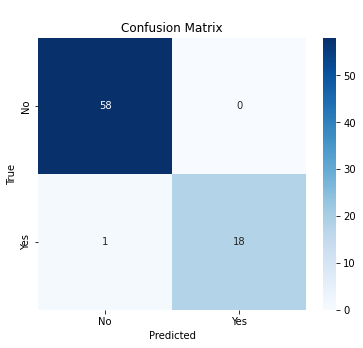

In [24]:
#Confusion Matrix 
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

          No       0.98      1.00      0.99        58
         Yes       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [26]:
# Feature Importance
importances = best_rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df.to_string(index=False))


Feature Importance:
             Feature  Importance
            Response    0.391380
                Risk    0.186539
                   N    0.116363
                   T    0.084844
          Adenopathy    0.058109
                 Age    0.048972
               Stage    0.041251
            Focality    0.014308
              Gender    0.013218
             Smoking    0.011657
Physical Examination    0.010419
           Pathology    0.008085
    Thyroid Function    0.007895
                   M    0.003257
          Hx Smoking    0.003150
     Hx Radiothreapy    0.000554
